## Assignment 1
## Predictive Modelling of Eating-Out Problem

**Importing Necessary Libraries** 

Note: You need to install those libraries before importing like few of following commands 


        pip install pandas library_name 
                (OR)
        conda install pandas library_name 

In [2]:
import pandas as pd
import geopandas as gpd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score


<br>

### Part A: Importing and Understanding Data

#### Data Importation and Overview

Load the zomato_df_final_data.csv and sydney.geojson data into Dataframe

In [3]:
# Load the data
csv_file = 'data/zomato_df_final_data.csv'
geojson_file = 'data/sydney.geojson'

# Reading the Zomato data and GeoJSON data
zomato_df = pd.read_csv(csv_file)
sydney_geojson = gpd.read_file(geojson_file)





#### Understanding the Dataset Structure

Summary of Zomato Dataframe

In [4]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [5]:
#Zomato dataframe have 10500 values(rows) with 17features(columns)
zomato_df.shape

(10500, 17)

Displaying First 5 Values(rows) of Zomato Dataframe

In [6]:
zomato_df.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b



The dataset contains the following features or columns: <br>

**address**: Location details of the restaurant. <br>
**cost**: Average cost for two people. <br>
**cuisine**: Types of cuisine offered. <br>
**lat and lng**: Latitude and longitude for the restaurant's location. <br>
**link**: URL to the restaurant’s Zomato page. <br>
**phone**: Phone number of the restaurant. <br>
**rating_number**: Numerical rating score (e.g., 4.0, 4.6). <br>
**rating_text**: Textual representation of the rating (e.g., "Very Good", "Excellent"). <br>
**subzone**: Subzone area within the city. <br>
**title**: Name of the restaurant. <br>
**type**: Restaurant type (e.g., Casual Dining, Fine Dining). <br>
**votes**: Number of votes (reviews) the restaurant has received. <br>
**groupon**: Boolean value indicating if the restaurant has Groupon offers. <br>
**color**: A color value, possibly representing a category in some context. <br>
**cost_2**: Normalized cost values. <br>
**cuisine_color**: A color representation for cuisines (perhaps related to visualization).  <br>

In [7]:
zomato_df.columns.tolist()

['address',
 'cost',
 'cuisine',
 'lat',
 'link',
 'lng',
 'phone',
 'rating_number',
 'rating_text',
 'subzone',
 'title',
 'type',
 'votes',
 'groupon',
 'color',
 'cost_2',
 'cuisine_color']

<br>

#### 1. Plots or Graphs

- Number of Unique cuisines are served by Sydney restaurants

In [8]:

# Correct cuisine parsing for handling string representation of lists
zomato_df['cuisine'] = zomato_df['cuisine'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Calculate unique cuisines
unique_cuisines_count = zomato_df['cuisine'].explode().nunique()

# Display results
print(unique_cuisines_count, " unique cuisines are served by Sydney restaurants")


134  unique cuisines are served by Sydney restaurants


- Top 3 Suburbs have the highest number of restaurants

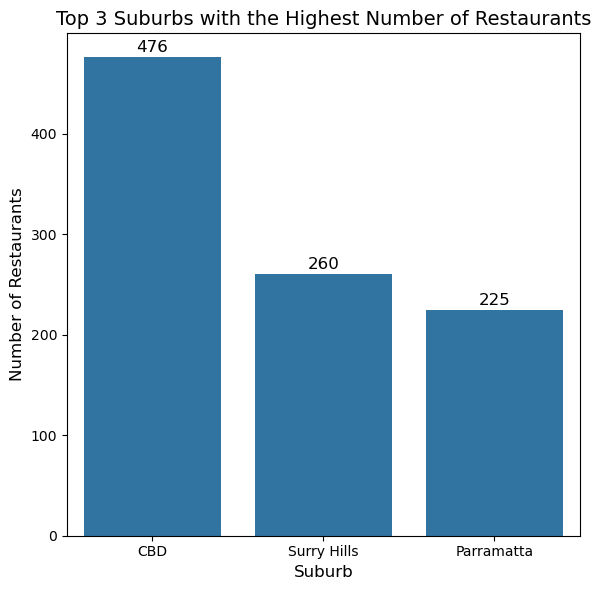

In [9]:
# Find top 3 suburbs with the highest number of restaurants
top_3_suburbs = zomato_df['subzone'].value_counts().head(3)

# Suburb names and restaurant counts extracted from the pandas Series
suburbs = top_3_suburbs.index.tolist()
restaurant_counts = top_3_suburbs.values.tolist()

# Plot 1: Top 3 suburbs with the highest number of restaurants and adding labels
plt.figure(figsize=(6, 6))
sns.barplot(x=suburbs, y=restaurant_counts)
plt.title('Top 3 Suburbs with the Highest Number of Restaurants', fontsize=14)
plt.xlabel('Suburb', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)

# Adding labels on the bars
for i, count in enumerate(restaurant_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()



- “Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ 
ratings are rarely expensive” Do you agree with this statement or not?


C:\Users\Tshering Gyeltshen\AppData\Local\Temp\ipykernel_9716\1354067303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating_text', y='cost', data=zomato_df, palette='Set2')


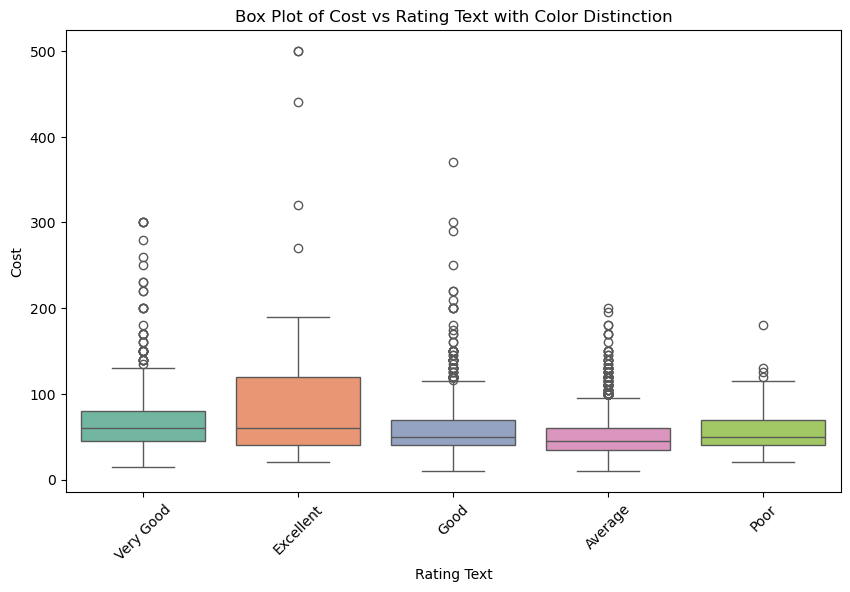

In [10]:
import seaborn as sns

# Create a box plot with color distinction for different rating texts
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_text', y='cost', data=zomato_df, palette='Set2')

# Adding labels and title
plt.title('Box Plot of Cost vs Rating Text with Color Distinction')
plt.xlabel('Rating Text')
plt.ylabel('Cost')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


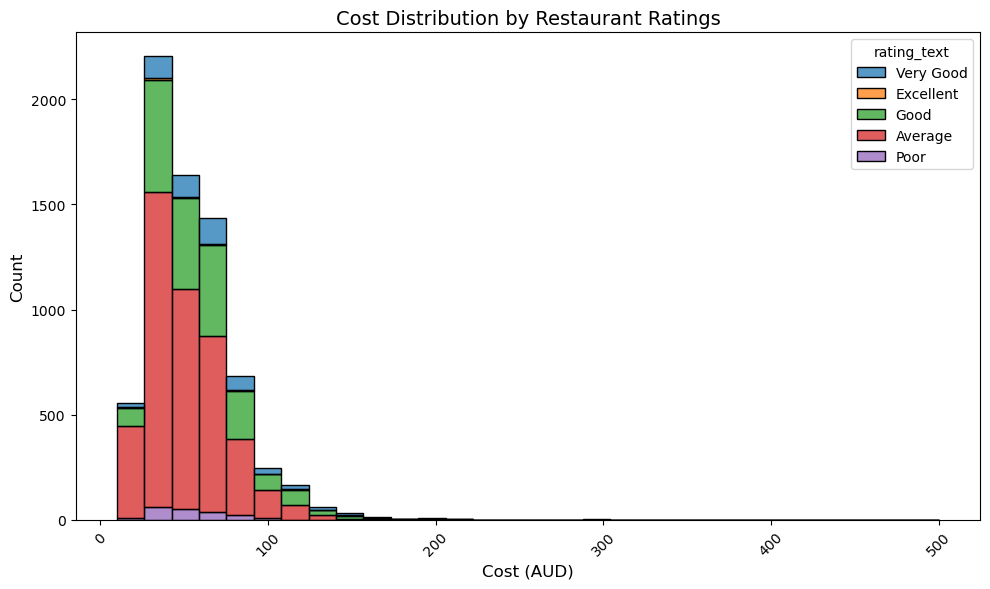

In [11]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plotting a stacked histogram to show the cost distribution by rating categories
sns.histplot(data=zomato_df, x="cost", hue="rating_text", multiple="stack", bins=30)

# Adding title and labels
plt.title("Cost Distribution by Restaurant Ratings", fontsize=14)
plt.xlabel("Cost (AUD)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Based on the provided box plot and STack-bar of "Cost vs Rating," it can be observed that restaurants with "Excellent" ratings tend to be more expensive, with a higher median cost and a wider interquartile range (IQR) indicating significant variability in pricing. Several outliers suggest that some "Excellent" rated restaurants are indeed quite costly. In contrast, restaurants with "Poor" ratings generally have lower costs, reflected in a narrower IQR, with fewer high-cost outliers. However, I would say I agree with the statement that "Restaurants with 'excellent' ratings are mostly costly while those with 'poor' ratings are rarely expensive," though with some exceptions. While "Excellent" rated restaurants are spread across a range of cost levels, many fall in the lower to mid-range, typically under AUD 100, indicating that not all are concentrated at the higher end of the cost spectrum. On the other hand, "Poor" rated restaurants are mostly associated with lower costs, typically below AUD 50, supporting the idea that they are rarely expensive. In conclusion, while "Poor" rated restaurants tend to be less costly, "Excellent" rated restaurants span a broader range of price points, rather than being predominantly costly.

#### 2. Exploratory Analysis


Histograms, distribution plots, and descriptive insights about following variables. 
- Cost
- Rating
- Type


- **Cost Distribution of Restaurants**

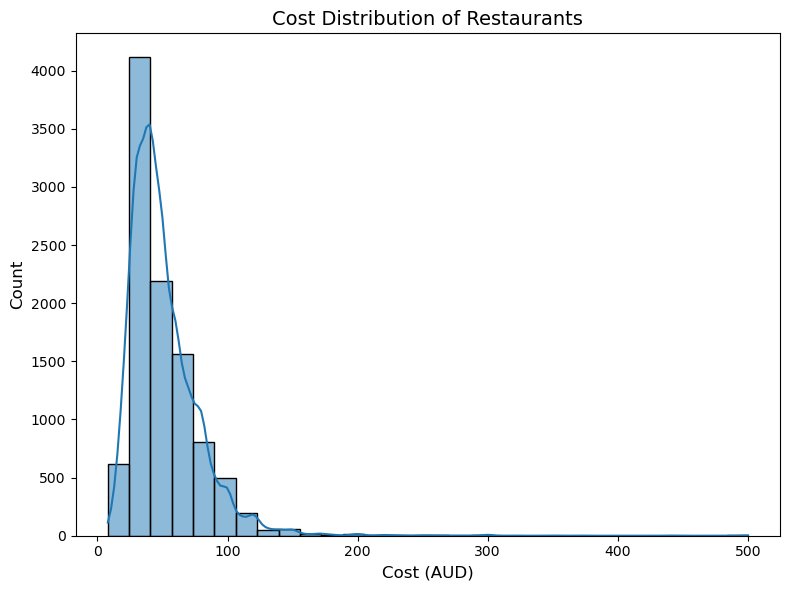

In [12]:

# Plot 1: Histogram for 'Cost'
plt.figure(figsize=(8, 6))
sns.histplot(zomato_df['cost'], bins=30, kde=True)
plt.title('Cost Distribution of Restaurants', fontsize=14)
plt.xlabel('Cost (AUD)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()





 From the Histogram of cost distribution of restaurants shows most values concentrated at the lower end, indicating that the majority of restaurants are relatively inexpensive. The right-skewed pattern highlights fewer higher-cost restaurants, with a long tail extending to the right. The KDE line emphasizes the concentration of low-cost restaurants, while high-cost outliers are rare. Overall, lower-cost restaurants are more common, and higher-cost ones are less frequent.

- **Rating Distribution**

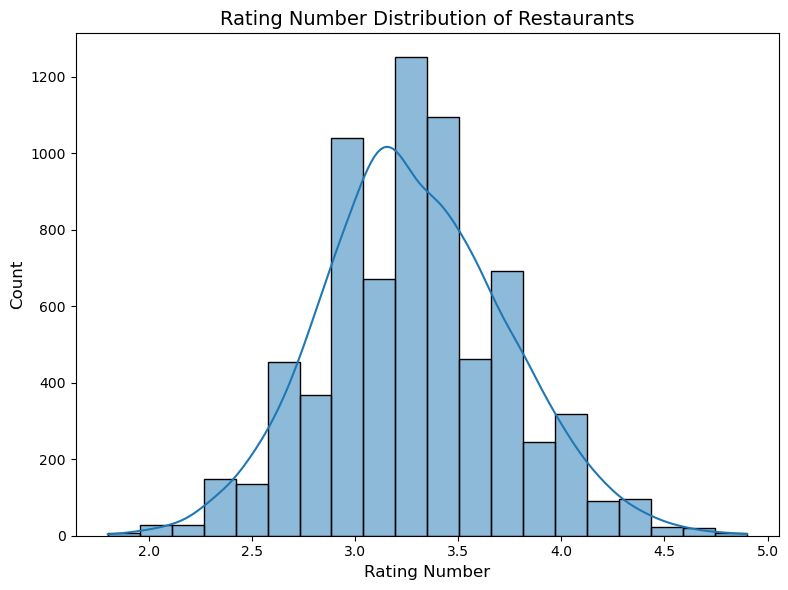

In [13]:

# Plot 2: Histogram for 'Rating Number'
plt.figure(figsize=(8, 6))
sns.histplot(zomato_df['rating_number'], bins=20, kde=True)
plt.title('Rating Number Distribution of Restaurants', fontsize=14)
plt.xlabel('Rating Number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


In this histogram, I can see that the ratings are mostly centered around the middle range, with most values falling between 3.0 and 3.5. This tells me that the majority of reataurants the dataset tend to have average ratings. There’s a noticeable peak around 3.5, making it the most common rating. As the ratings move toward the lower and higher ends, the frequency drops, indicating that very low and very high ratings are much less common. Overall, this distribution suggests that average ratings are the most common, with fewer instances of extreme ratings.


- **Top 10 Restaurant Types**

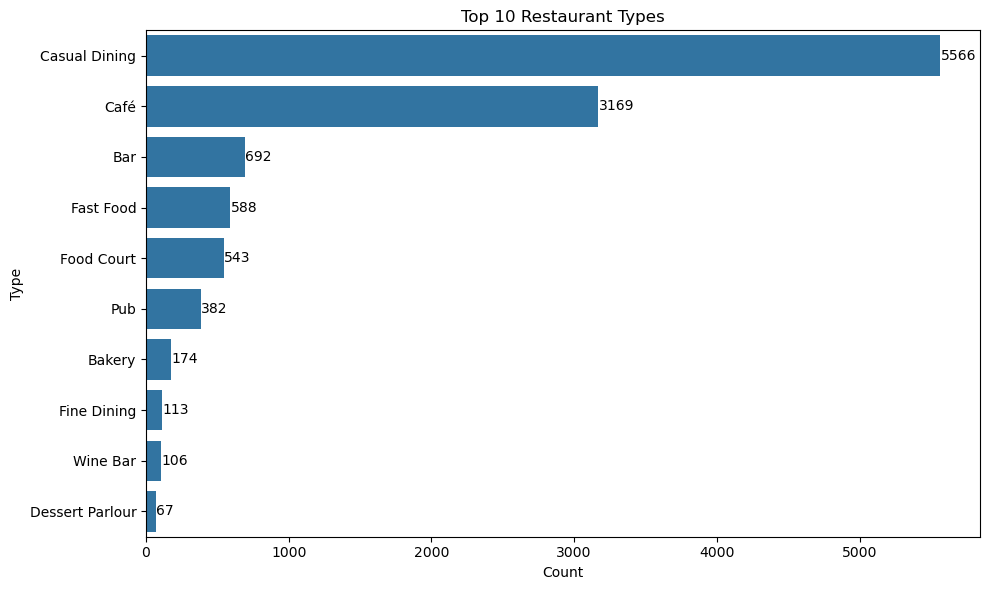

In [14]:
# 3. Bar plot for 'Type' (Business type of restaurant)
# Replace NaN values with empty lists and ensure string lists are converted properly
zomato_df['type'] = zomato_df['type'].fillna('[]')  # Fill NaN with empty lists
zomato_df['type'] = zomato_df['type'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Explode the 'type' column to separate out individual types
zomato_df_exploded = zomato_df.explode('type')

# Count the occurrences of each restaurant type
type_counts = zomato_df_exploded['type'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=type_counts.values, y=type_counts.index)

# Add count labels on the bars
for i, v in enumerate(type_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.title("Top 10 Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()


Casual dining is by far the most prevalent type, with 5,566 entries, followed by cafés, which also make up a significant portion with 3,169. Bars, fast food outlets, and food courts fall next, with counts ranging from 500 to 700. Pub-type restaurants are less common, followed by smaller categories such as bakeries, fine dining, wine bars, and dessert parlors, each with fewer than 200 entries. 

#### 3- Cuisine Density Map

Here sydney.geojson file is used which contains geographical data for Sydney. The file include features like polygons, points, or lines representing different areas, locations, or boundaries in Sydney.


Below are the Cuisine Density Map of 

- Chinese Cuisine 
- Indian Cuisine
- Australian Cuisine
- Japanese Cuisine
- Thai Cuisine
- Korean Cuisine
- Italian Cuisine


<Figure size 1600x1200 with 0 Axes>

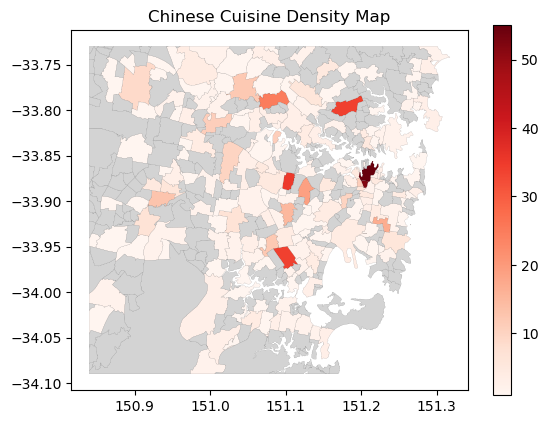

<Figure size 1600x1200 with 0 Axes>

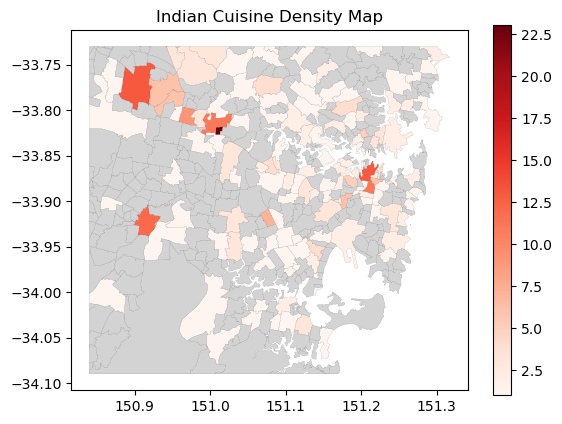

<Figure size 1600x1200 with 0 Axes>

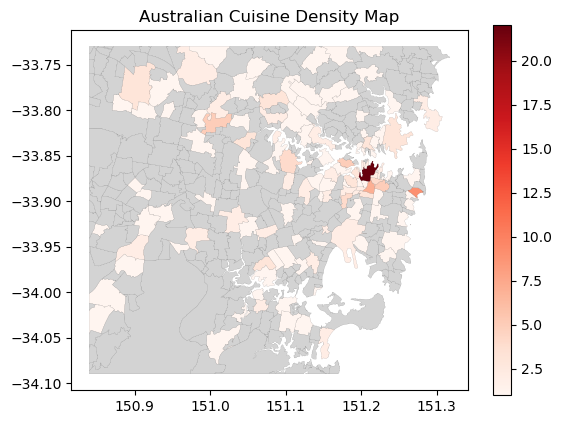

<Figure size 1600x1200 with 0 Axes>

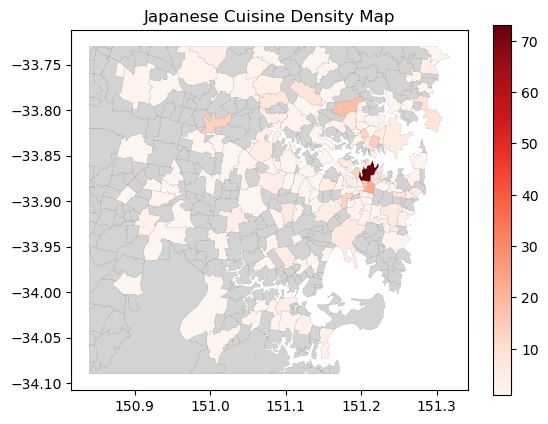

<Figure size 1600x1200 with 0 Axes>

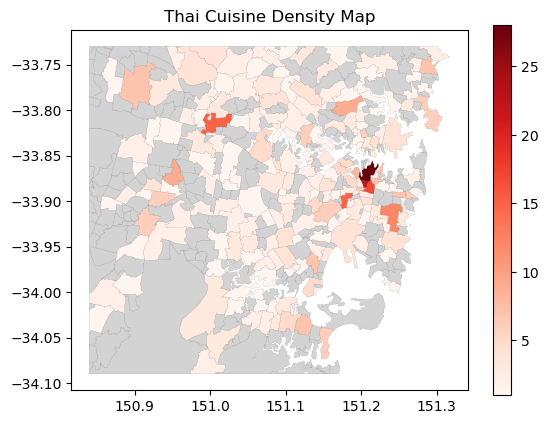

<Figure size 1600x1200 with 0 Axes>

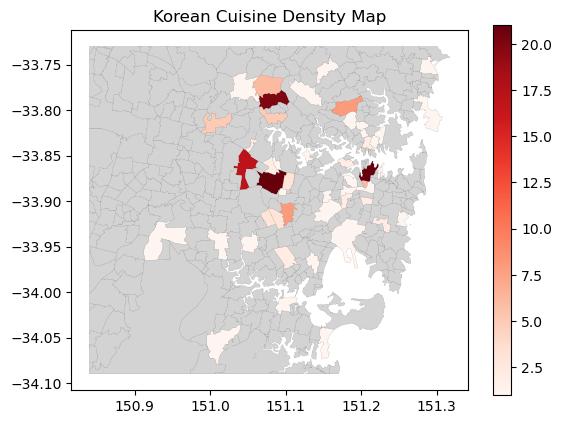

<Figure size 1600x1200 with 0 Axes>

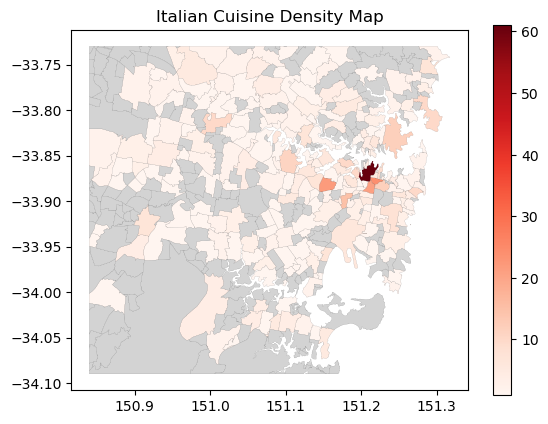

In [15]:

# Convert restaurant data into a GeoDataFrame using latitude and longitude
zomato_df_geo = gpd.GeoDataFrame(zomato_df, geometry=gpd.points_from_xy(zomato_df.lng, zomato_df.lat))

# Ensure that the restaurant data has the same CRS as the geojson data
zomato_df_geo = zomato_df_geo.set_crs(epsg=4326, allow_override=True)

# Function to create a cuisine density map with boundary lines
def show_cuisine_densitymap(cuisine_type):
    # Filter the dataset for the chosen cuisine type
    cuisine_restaurants = zomato_df_geo[zomato_df_geo['cuisine'].apply(lambda x: cuisine_type in x)]
    
    # Perform a spatial join between the restaurant locations and the geojson suburbs
    cuisine_with_suburb = gpd.sjoin(cuisine_restaurants, sydney_geojson, how='inner', predicate='within')
    
    # Group by suburb and count the number of restaurants serving this cuisine
    cuisine_density = cuisine_with_suburb.groupby('SSC_NAME').size().rename('restaurant_count')
    
    # Merge the cuisine density data with the geojson file
    merged = sydney_geojson.set_index('SSC_NAME').join(cuisine_density)
    
    # Plot the result with boundary lines
    plt.figure(figsize=(16, 12))
    merged.plot(column='restaurant_count', cmap='Reds', legend=True, 
                edgecolor='black', linewidth=0.05, missing_kwds={"color": "lightgrey"})
    plt.title(f"{cuisine_type} Cuisine Density Map")
    plt.show()

# Cuisine density map for Chinese cuisine
show_cuisine_densitymap('Chinese')

# Cuisine density map for Indian cuisine 
show_cuisine_densitymap('Indian')

# Cuisine density map for Australian cuisine 
show_cuisine_densitymap('Australian')

# Cuisine density map for Japanese cuisine 
show_cuisine_densitymap('Japanese')

# Cuisine density map for Thai cuisine 
show_cuisine_densitymap('Thai')

# Cuisine density map for Korean cuisine 
show_cuisine_densitymap('Korean')

# Cuisine density map for Italian cuisine 
show_cuisine_densitymap('Italian')


#### 4: Interactive Plotting

In [16]:
import plotly.graph_objects as go  # Import the graph_objects module
import pandas as pd

# List of cuisine types to be included in the dropdown
cuisine_types = ['Chinese', 'Indian', 'Italian', 'Thai', 'Japanese', 'Korean', 'Australian']

# Create an empty figure
fig = go.Figure()

# Add a map for each cuisine type (using Plotly’s Scattermapbox)
for cuisine_type in cuisine_types:
    cuisine_restaurants = zomato_df[zomato_df['cuisine'].apply(lambda x: cuisine_type in x)]
    
    # Assuming that the number of restaurants in the area can be used for density (size of each point)
    fig.add_trace(
        go.Scattermapbox(
            lat=cuisine_restaurants['lat'],
            lon=cuisine_restaurants['lng'],
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=9, 
                color='red',  # Set marker color to red for all points
                opacity=0.6  # Set transparency to enhance density effect
            ),
            text=cuisine_restaurants['subzone'],  # Suburb names
            hoverinfo='text',
            name=cuisine_type,
            visible=False  # All traces start as invisible
        )
    )

# Set the first cuisine type (e.g., Chinese) to be visible
fig.data[0].visible = True

# Create dropdown buttons for each cuisine
dropdown_buttons = [
    dict(
        args=[{'visible': [True if i == k else False for i in range(len(cuisine_types))]}],
        label=cuisine_types[k],
        method='update'
    ) for k in range(len(cuisine_types))
]

# Update layout with dropdown and set a larger figure size
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=10,
    mapbox_center={"lat": -33.8688, "lon": 151.2093},
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.1,
        "yanchor": "top"
    }],
    title="Cuisine Density Map in Sydney",
    height=600,  # Set the height of the plot
    width=1100   # Set the width of the plot
)

# Display the interactive map with the dropdown
fig.show()


As shown in the 7 static and 1 interactive Cuisine Density Map plots above, here are the limitations of non-interactive plotting and how interactive plotting with Plotly addresses these issues.

**Limitations of Non-Interactive Plotting:**
1. **Static Representation**: <br>
&nbsp; Non-interactive maps are static, restricting zoom and exploration. Users can’t focus on specific suburbs or areas of interest.
2. **Limited Exploration**: <br>
&nbsp; Switching between cuisines requires generating separate maps, making the analysis inefficient.
3. **Overcrowding**: <br>
&nbsp; Densely packed areas can be hard to interpret without zooming, leading to unclear visualizations.
4. **No Hover Information**: <br>
&nbsp; Static plots don’t provide details about individual points, like restaurant names or ratings.
5. **No Filtering**: <br>
&nbsp; Users can’t dynamically filter data by criteria like rating or cost, limiting the depth of analysis.

**How Interactive Plotting (Plotly) Solves These Issues:**
1. **Dynamic Exploration**:<br>
&nbsp; Users can zoom and pan, making it easier to explore and analyze specific areas.
2. **Cuisines Toggle**:<br>
&nbsp; Dropdowns allow users to switch between cuisines on the same map without regenerating new plots.
3. **Hover Details**: <br>
&nbsp; Interactive maps provide tooltips with detailed information, keeping the map clean yet informative.
4. **Real-Time Filtering**: <br>
&nbsp; Users can filter data in real-time (e.g., by rating or cost), leading to faster, more efficient analysis.
5. **Better Visualization**:<br>
&nbsp; Zooming and dynamic marker sizes reveal insights in densely packed areas, improving clarity.

In short, `Plotly` makes analysis more dynamic, flexible, and user-friendly, overcoming the limitations of static plots in exploratory spatial data analysis.


#### 5. Tableau

Following is link for Tableaue Visulization Dashbord in Tablueau Public

 https://public.tableau.com/views/ZomatoSydneyRestaurantVIz/SydneyRestaurantDashboard?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

<br><br>
### Part B - Predictive Modelling

#### 1. Pre-Processing and Feature Engineering

**Checking categorical and numerical columns**

In [17]:
# Identify categorical columns (object or categorical types)
categorical_columns = zomato_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical columns (integer and float types)
numerical_columns = zomato_df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns \n", categorical_columns)

print("Numerical Columns \n",numerical_columns)

Categorical Columns 
 ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']
Numerical Columns 
 ['cost', 'lat', 'lng', 'rating_number', 'votes', 'cost_2']


##### 1.1 Data Cleaning 

**Removing Duplicates**

In [18]:
# Check for duplicates in all hashable columns (excluding columns that may contain lists)
hashable_columns = [col for col in zomato_df.columns if zomato_df[col].apply(type).isin([list]).sum() == 0]

# Check duplicates and drop them
zomato_df.duplicated(subset=hashable_columns).sum()
zomato_df.drop_duplicates(subset=hashable_columns, inplace=True)


**Handling Missing Values**

Numerical columns were imputated with Median and Mean where as Categorical columns were imputated with mode. <br><br>
For the **cost** and **cost_2** columns, missing values were replaced with the median to avoid the influence of outliers.<br> 
The missing **latitude ('lat')** and **longitude ('lng')** values were filled with their mean, providing a central estimate for locations. <br>
Rows with missing values in critical columns like **rating_number**, **rating_text**, and **votes** were dropped to preserve data integrity for these key features. <br>
For the 'type' column, missing values were replaced with the most frequent category, ensuring consistent representation. 

In [19]:
# Checking for missing values in the dataset
missing_values = zomato_df.isnull().sum()

# Display the number of missing values per column
missing_values

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type                0
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

In [20]:
# Impute missing 'cost' with median
zomato_df['cost'].fillna(zomato_df['cost'].median(), inplace=True)

zomato_df['cost_2'].fillna(zomato_df['cost_2'].median(), inplace=True)

# Impute missing 'lat' and 'lng' with mean values
zomato_df['lat'].fillna(zomato_df['lat'].mean(), inplace=True)
zomato_df['lng'].fillna(zomato_df['lng'].mean(), inplace=True)

# Drop rows where 'rating_number', 'rating_text', or 'votes' are missing
zomato_df.dropna(subset=['rating_number', 'rating_text', 'votes'], inplace=True)

# Verify the cleaning process
cleaned_missing_values = zomato_df.isnull().sum()

# Display the cleaned missing values
cleaned_missing_values


address          0
cost             0
cuisine          0
lat              0
link             0
lng              0
phone            0
rating_number    0
rating_text      0
subzone          0
title            0
type             0
votes            0
groupon          0
color            0
cost_2           0
cuisine_color    0
dtype: int64

##### 1.2 Feature Encoding

I have used One-Hot Encoding to encode features like subzone, type and cuisines 

In [21]:
# Convert lists to strings for 'subzone', 'type', and 'cuisine' 
zomato_df['cuisine'] = zomato_df['cuisine'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
zomato_df['subzone'] = zomato_df['subzone'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
zomato_df['type'] = zomato_df['type'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Apply one-hot encoding to 'subzone', 'type', and 'cuisine'
zomato_df_encoded = pd.get_dummies(zomato_df, columns=['subzone', 'type', 'cuisine'], prefix=['subzone', 'type', 'cuisine'])

# Convert 'groupon' to a binary variable (True/False -> 1/0)
zomato_df_encoded['groupon'] = zomato_df_encoded['groupon'].astype(int)

# Verify the one-hot encoding
zomato_df_encoded.head()


,address,cost,lat,link,lng,phone,rating_number,rating_text,title,votes,...,"cuisine_Vietnamese, Sandwich, Coffee and Tea","cuisine_Vietnamese, Seafood, Vegetarian","cuisine_Vietnamese, Street Food","cuisine_Vietnamese, Thai","cuisine_Vietnamese, Thai, Vegetarian, Vegan","cuisine_Vietnamese, Vegan","cuisine_Vietnamese, Vegetarian",cuisine_Yum Cha,"cuisine_Yum Cha, Chinese","cuisine_Yum Cha, Seafood"
0,"371A Pitt Street, CBD, Sydney",50.0,-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,Sydney Madang,1311.0,...,False,False,False,False,False,False,False,False,False,False
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,The Grounds of Alexandria Cafe,3236.0,...,False,False,False,False,False,False,False,False,False,False
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,Sokyo,1227.0,...,False,False,False,False,False,False,False,False,False,False
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Bennelong Restaurant,278.0,...,False,False,False,False,False,False,False,False,False,False
4,"20 Campbell Street, Chinatown, Sydney",55.0,-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chat Thai,2150.0,...,False,False,False,False,False,False,False,False,False,False


After One-Hot-Encoding there total of 1946 features and follwing are column names 

In [22]:
zomato_df_encoded.shape, zomato_df_encoded.columns.tolist()

((7183, 1965),
 ['address',
  'cost',
  'lat',
  'link',
  'lng',
  'phone',
  'rating_number',
  'rating_text',
  'title',
  'votes',
  'groupon',
  'color',
  'cost_2',
  'cuisine_color',
  'subzone_3 Weeds, Rozelle',
  'subzone_Abbotsford',
  'subzone_Alexandria',
  'subzone_Amora Hotel Jamison Sydney, CBD',
  'subzone_Annandale',
  'subzone_Arncliffe',
  'subzone_Art Gallery of New South Wales',
  'subzone_ArtHouse Hotel',
  'subzone_Artarmon',
  'subzone_Ashfield',
  'subzone_Auburn',
  'subzone_Auburn Central, Auburn',
  'subzone_Australia Square Food Court, CBD',
  'subzone_Avalon',
  'subzone_Balgowlah',
  'subzone_Balgowlah RSL',
  'subzone_Balmain',
  'subzone_Bangor',
  'subzone_Bangor Shopping Centre, Bangor',
  'subzone_Bankstown',
  'subzone_Bankstown Central, Bankstown ',
  'subzone_Bankstown Sports Club, Bankstown',
  'subzone_Barangaroo',
  'subzone_Barangaroo House',
  'subzone_Baulkham Hills',
  'subzone_Bayside Plaza, Brighton Le-Sands',
  'subzone_Beecroft',
  'sub

**Removing the Features that are not needed for Predictive Model.**

Additionally Droping Columns having missing values more than 30%

In [23]:
# List of columns that are not needed for the model
columns_to_remove = ['address', 'cuisine', 'link', 'phone', 'title', 'subzone', 'type', 'rating_text', 'color', 'cuisine_color']

# Remove the unnecessary columns from the dataset
zomato_df_cleaned = zomato_df_encoded.drop(columns=columns_to_remove, errors='ignore')

# Additionally, if there are columns with too many missing values, remove those as well
# For example, if you want to remove columns with more than 30% missing values:
threshold = 0.3 * zomato_df_encoded.shape[0]
columns_with_many_missing = zomato_df_encoded.isnull().sum()[zomato_df_encoded.isnull().sum() > threshold].index.tolist()

# Drop columns with too many missing values
zomato_df_cleaned = zomato_df_cleaned.drop(columns=columns_with_many_missing, errors='ignore')

# Display the cleaned dataset
zomato_df_cleaned.shape

(7183, 1958)

<br>

#### 2. Regression Model

**Separate the features (X) and the target (y)**

Target(y): rating_number <br>
Features(X): Rest of columns

In [24]:

# Separate the features (X) and the target (y)
X = zomato_df_cleaned.drop(columns=['rating_number'])  # Exclude the 'rating_number' column from the features
y = zomato_df_cleaned['rating_number']  # Set 'rating_number' as the target variable

X.shape, y.shape

((7183, 1957), (7183,))

**Scaling**

Using Standardisation technique to reduce the variance effect and overcome the fitting problem.

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Spliting Data**

Spliting Data into 80-20 percent train and test set respectively. 

In [26]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)



**Feature Selection**

I am using Lasso regression to perform feature selection by identifying the most important features with non-zero coefficients, effectively reducing the dimensionality of the dataset.

In [27]:
# Initialize Lasso model with a chosen alpha (regularization strength)
lasso = Lasso(alpha=0.01)  # You can adjust alpha as needed

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Identify the important features (those with non-zero coefficients)
important_features = [feature for feature, coef in zip(X.columns, lasso.coef_) if coef != 0]

# Reduce X to only important features
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

print(f"Number of selected features: {len(important_features)}")
print(f"Selected features: {important_features}")



Number of selected features: 153
Selected features: ['cost', 'votes', 'cost_2', 'subzone_Amora Hotel Jamison Sydney, CBD', 'subzone_Balmain', 'subzone_Blacktown', 'subzone_Bondi Beach', 'subzone_Burwood', 'subzone_Canley Heights', 'subzone_Castle Towers, Castle Hill', 'subzone_Central Park, Chippendale', 'subzone_Chatswood', 'subzone_Chatswood Chase, Chatswood', 'subzone_Chatswood Interchange, Chatswood', 'subzone_Cockle Bay Wharf ', 'subzone_Crows Nest', 'subzone_DFO Homebush, Homebush', 'subzone_Danks Street Shopping Plaza, Waterloo', 'subzone_Darlinghurst', 'subzone_Enmore', 'subzone_Erskineville', 'subzone_Five Dock', 'subzone_Foodbase, CBD', 'subzone_Glebe', 'subzone_Harbourside Shopping Centre, Darling Harbour', 'subzone_Hurstville', 'subzone_Kensington Street, Chippendale', 'subzone_Leichhardt', 'subzone_Liverpool', 'subzone_Macquarie Centre, Macquarie Park', 'subzone_Manly', 'subzone_Marketplace, West Ryde', 'subzone_Marrickville', 'subzone_Moore Park', 'subzone_Neutral Bay', '

##### 2.1 Linear Regression Model

Linear Regression Model to predict the restaurant rating 
(numeric rating) from other selected features (columns) 

In [28]:
# Here's an example of fitting a Linear Regression model on the reduced data
from sklearn.linear_model import LinearRegression
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = model_regression_1.predict(X_test_selected)
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE) for Model 1: {mse_lr}")

Mean Squared Error (MSE) for Model 1: 0.14760270366176395


##### 2.2 linear regression model (model_regression_2) using the Gradient Descent

In this GradientDescentLinearRegression class, I implement linear regression using batch gradient descent for multiple features. I set the learning rate and the number of iterations when initializing the model. In the fit method, I align the input data (X and y) as pandas objects and initialize the weights (theta) and bias to zero. During each iteration of gradient descent, I calculate the predicted values (y_pred), compute the gradients for the weights and bias, and update them to minimize the error. The predict method allows me to use the learned weights and bias to make predictions on new data. This iterative process helps me optimize the weights, fitting a linear model to the data efficiently.

I have used following reference link to create a GradientDescentLinearRegression Class <br>
Reference Code: https://github.com/ibrahim-radwan/DSTS/blob/main/LR_GD_python.ipynb

In [29]:
# Create a class for the linear regression with Gradient Descent for multiple features
class GradientDescentLinearRegression:
    def __init__(self, learning_rate, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X, y):
        # Ensure X and y are aligned
        X = pd.DataFrame(X).reset_index(drop=True)  # Ensure X is a pandas DataFrame and reset index
        y = pd.Series(y).reset_index(drop=True)     # Ensure y is a pandas Series and reset index
        
        # Initialize parameters (weights) for each feature plus the bias term
        n, m = X.shape  # n = number of samples, m = number of features
        self.theta = pd.Series(0, index=X.columns)  # Initialize weights to zero
        self.bias = 0.0  # Initialize bias (intercept) to zero
        
        # Gradient Descent Algorithm
        for _ in range(self.iterations):
            # Calculate predictions
            y_pred = X.dot(self.theta) + self.bias
            
            # Compute gradients
            d_theta = -(2 / n) * X.T.dot(y - y_pred)  # Gradient for weights (features)
            d_bias = -(2 / n) * (y - y_pred).sum()    # Gradient for the bias term
            
            # Update parameters
            self.theta = self.theta - self.learning_rate * d_theta
            self.bias = self.bias - self.learning_rate * d_bias
        
    def predict(self, X):
        X = pd.DataFrame(X).reset_index(drop=True)  # Ensure X is a pandas DataFrame and reset index
        return X.dot(self.theta) + self.bias


Learning Rate of 0.0021 gives best result. 

In [30]:
# Example usage with multi-dimensional data
model_regression_3 = GradientDescentLinearRegression(learning_rate=0.0021, iterations=1000)

# Reset the indices of X_train_selected and y_train to ensure alignment
X_train_selected = pd.DataFrame(X_train_selected).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)

# Train the model
model_regression_3.fit(X_train_selected, y_train)

# Make predictions on the test set
X_test_selected = pd.DataFrame(X_test_selected).reset_index(drop=True)
y_pred_gd = model_regression_3.predict(X_test_selected)

# Evaluate the model with Mean Squared Error (MSE)
mse_gd = mean_squared_error(y_test, y_pred_gd)
print(f"Mean Squared Error (MSE) for Gradient Descent Linear Regression model: {mse_gd}")

Mean Squared Error (MSE) for Gradient Descent Linear Regression model: 0.14078776064375378


Alternative to above Batch Gradient Descent class we can use SGDRegressor library from sci-kit learn package.<br>
SGDRegressor fits a linear regression model using **Stochastic Gradient Descent (SGD)**. Unlike above Gradient Descent SGDRegressor updates the weights incrementally after computing the gradient for each data point (or a small subset, i.e., mini-batch) rather than using the entire dataset. <br>
 I have used initial learnining rate as 0.000021 

In [31]:
from sklearn.linear_model import SGDRegressor
# Create and train the model using SGD (Gradient Descent)
model_regression_2 = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.000021)
model_regression_2.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_sgd = model_regression_2.predict(X_test_selected)

# Calculate Mean Squared Error (MSE)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print(f"Mean Squared Error (MSE) for SGDRegressor (Gradient Descent) model: {mse_sgd}")

Mean Squared Error (MSE) for SGDRegressor (Gradient Descent) model: 0.1406802753892437


##### 2.3 Result

In [32]:
mse_data = {
    "Model": [ "Linear Regression (Model 1)", "SGDRegressor(Model 2)", "Batch Gradient Descent (Model 3)"],
    "MSE": [mse_lr, mse_sgd, mse_gd]
}

# Convert the dictionary into a pandas DataFrame
mse_df = pd.DataFrame(mse_data)

# Set the index to start from 1 and recreate the table
mse_df.index = mse_df.index + 1

# Print the table for visual confirmation
mse_df

,Model,MSE
1,Linear Regression (Model 1),0.147603
2,SGDRegressor(Model 2),0.140680
3,Batch Gradient Descent (Model 3),0.140788


**Result**

I have used three model Linear Regression (Model 1), SGDRegressor (Model 2), and custom made class of Batch Gradient Descent (Model 3). <br>
The results show that all three models perform similarly in terms of prediction accuracy, with slight variations in MSE. Model 1, the standard linear regression, has an MSE of 0.147587. Model 2, using stochastic gradient descent (SGDRegressor), slightly outperforms the others with the lowest MSE of 0.140683. Model 3, using batch gradient descent, follows closely with an MSE of 0.140788. These results from above table indicate that both SGD and batch gradient descent offer minor improvements over standard linear regression in this case, with SGD showing the best performance.

<br><br>

#### 3. Classification

##### 3.1 Binary Classifications

Making two class where class 1 contains ‘Poor’ and ‘Average’ records while class 2 contains ‘Good’, ‘Very Good’ and ‘Excellent’ records.

In [33]:
# Step 2: Simplify the 'rating_text' column into two classes
def simplify_ratings(rating):
    if rating in ['Poor', 'Average']:
        return 1  # Class 1
    elif rating in ['Good', 'Very Good', 'Excellent']:
        return 2  # Class 2
    else:
        return None  # Exclude other records

# Apply simplification to create binary classification
zomato_df_encoded['binary_rating'] = zomato_df_encoded['rating_text'].apply(simplify_ratings)

# Step 3: Drop rows with no classification in 'binary_rating'
zomato_df_encoded1 = zomato_df_encoded.dropna(subset=['binary_rating'])




**Separate the features (X) and the target (y)**

For Features I have droped all non-numeric columns and set the binary_rating as target

In [34]:
# Select features (we will drop non-numeric columns and the target column)
X = zomato_df_encoded1.drop(columns=['rating_text', 'binary_rating','rating_number', 'address', 'link', 'phone', 'title',  'color', 'cuisine_color'])
y = zomato_df_encoded1['binary_rating']


**Scaling: Standardisation**

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Split the dataset into 80% training and 20% test data**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


**Dimensionality Reduction**

In [37]:
# Initialize Lasso model with a chosen alpha (regularization strength)
lasso = Lasso(alpha=0.01)  # You can adjust alpha as needed

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Identify the important features (those with non-zero coefficients)
important_features = [feature for feature, coef in zip(X.columns, lasso.coef_) if coef != 0]

# Reduce X to only important features
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

print(f"Number of selected features: {len(important_features)}")
print(f"Selected features: {important_features}")


Number of selected features: 174
Selected features: ['cost', 'votes', 'cost_2', 'subzone_Amora Hotel Jamison Sydney, CBD', 'subzone_Balmain', 'subzone_Bankstown', 'subzone_Barangaroo', 'subzone_Bella Vista', 'subzone_Blacktown', 'subzone_Bondi Beach', 'subzone_Bonnyrigg', 'subzone_Campbelltown Mall, Campbelltown', 'subzone_Chatswood Interchange, Chatswood', 'subzone_Chippendale', 'subzone_Circular Quay Wharf, CBD', 'subzone_Cockle Bay Wharf ', 'subzone_Colonial Centre, CBD', 'subzone_Crows Nest', 'subzone_Darlinghurst', 'subzone_Edgecliff Centre, Edgecliff', 'subzone_Enmore', 'subzone_Five Dock', 'subzone_Glebe', 'subzone_Greenwood Plaza, North Sydney', 'subzone_Harbour Rocks Hotel, The Rocks ', 'subzone_Harbourside Shopping Centre, Darling Harbour', 'subzone_Kensington Street, Chippendale', 'subzone_Leichhardt', 'subzone_Lidcombe', 'subzone_Macquarie Centre, Macquarie Park', 'subzone_Marrickville', 'subzone_Marriott Sydney Harbour, Circular Quay', 'subzone_McMahons Point', 'subzone_Ne

##### 3.2 Logistic Regression Model


In [38]:
model_classification_3 = LogisticRegression(random_state=0)
model_classification_3.fit(X_train_selected, y_train)
y_pred_lr = model_classification_3.predict(X_test_selected)

3.3 Confusion Matrix

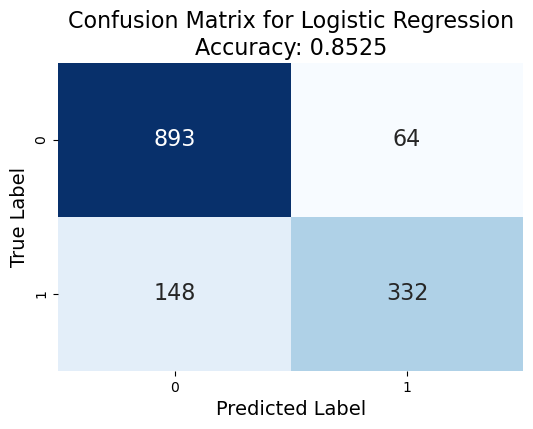

In [45]:
# Assuming y_test and y_pred are already available
conf_matrix = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

# Set plot titles and labels
plt.title(f'Confusion Matrix for Logistic Regression\nAccuracy: {accuracy_lr:.4f}', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the plot with accuracy on top
plt.show()

**Result Report**

Here in above confusion matrix of logistic regression model.<br>
 **Class 0** represents "Poor" and "Average" ratings. <br>
 **Class 1** represents "Good," "Very Good," and "Excellent" ratings. <br>
 
 **Interpretation of the Confusion Matrix:**
 
 The model correctly predicted 893 records as Class 0 i.e. True Negatives (TN), but misclassified 64 records from Class 0 as Class 1 i.e. False Positives (FP).<br> Similarly, it correctly identified 332 records as Class 1 i.e. False Negatives (FN) but misclassified 148 records from Class 1 as Class 0 i.e. True Positives (TP). The Logistic Regression Model achieved an overall accuracy of 85%
 
 The accuracy of 85.25% indicates that the model is reasonably effective, though there’s room for improvement, particularly in reducing false negatives (where "Good" or "Excellent" ratings were misclassified as "Poor" or "Average").

##### 3.4 Conclusions and Observations

Distribution of binary ration of class 0 and class 1

binary_rating
1    4710
2    2473
Name: count, dtype: int64


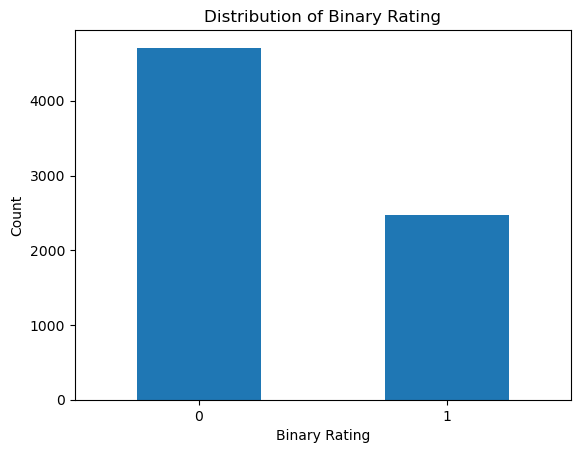

In [46]:
# Check the distribution of binary_rating
binary_rating_distribution = zomato_df_encoded1['binary_rating'].value_counts()
print(binary_rating_distribution)

# Plotting the distribution of binary_rating
binary_rating_distribution.plot(kind='bar')
plt.title('Distribution of Binary Rating')
plt.xlabel('Binary Rating')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.show()


**Class-Specific Performance:**

- True Negative Rate (TNR): The model performs well for class "0" (True Negative Rate = 893/(893+64) = 93.3%).
- True Positive Rate (TPR): The performance for class "1" is lower (True Positive Rate = 332/(332+148) = 69.2%).

Overall, the model performs exceptionally well on predicting the class 0, but struggles with predicting the class 1. This is likely due to class imbalance in distribution as you can see in graph above. where it has learned to predict the majority class ("0") more accurately due to its prevalence in the data. 

##### 3.5  Other CLassfication Models

**Random Forest Classifier**

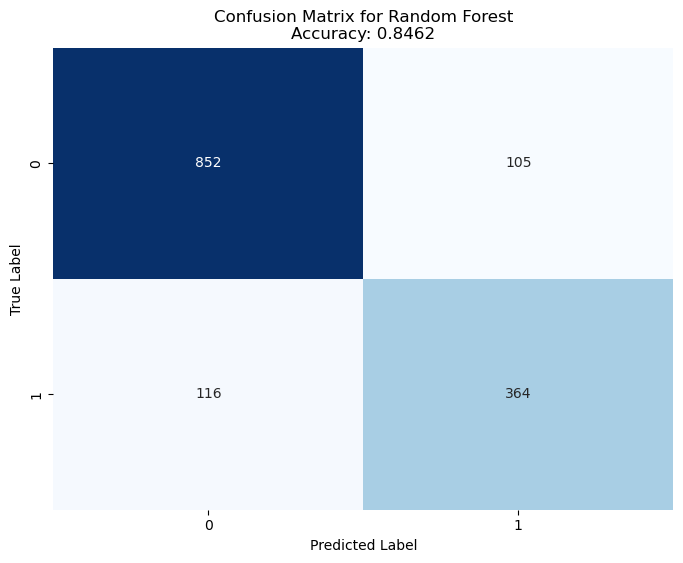

In [47]:
# Fitting the Random Forest model
model_classification_4 = RandomForestClassifier(random_state=0)
model_classification_4.fit(X_train_selected, y_train)
y_pred_rf = model_classification_4.predict(X_test_selected)

# Calculating the confusion matrix and accuracy
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Plotting the confusion matrix with accuracy
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for Random Forest\nAccuracy: {accuracy_rf:.4f}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Support Vector Classifier**

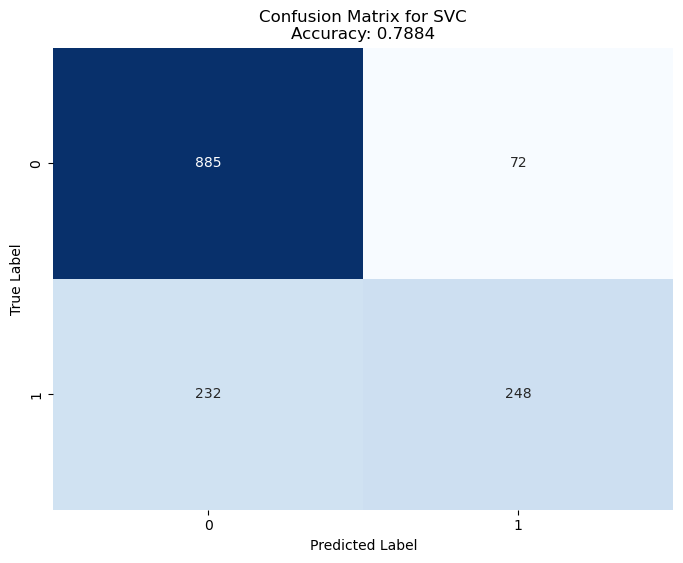

In [48]:
# Fitting the SVC model
model_svc = SVC(random_state=0)
model_svc.fit(X_train_selected, y_train)
y_pred_svc = model_svc.predict(X_test_selected)

# Calculating confusion matrix and accuracy
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Plotting the confusion matrix with accuracy for SVC
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for SVC\nAccuracy: {accuracy_svc:.4f}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**K-Nearest Neighbors (KNN)**



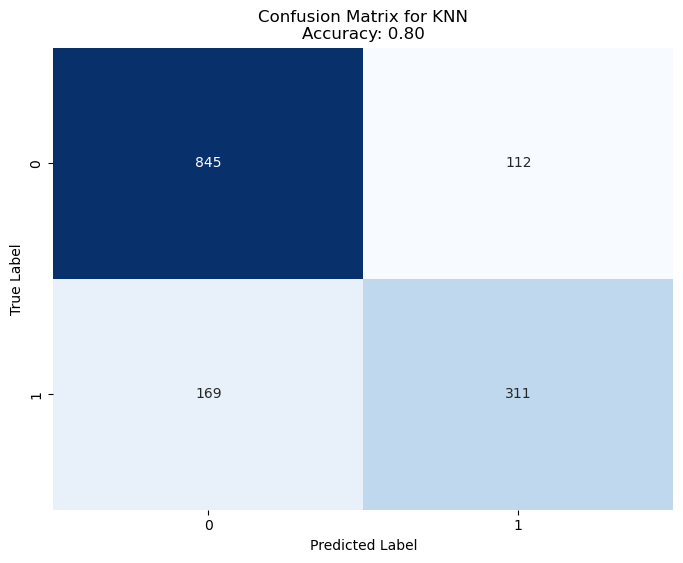

In [49]:
# Fitting the K-Nearest Neighbors (KNN) model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_selected, y_train)
y_pred_knn = model_knn.predict(X_test_selected)

# Calculating confusion matrix and accuracy for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Plotting the confusion matrix with accuracy for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for KNN\nAccuracy: {accuracy_knn:.2f}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
# Step 9: Draw conclusions
print("\nSummary of Model Accuracies:")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"SVC Accuracy: {accuracy_svc:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")


Summary of Model Accuracies:
Logistic Regression Accuracy: 0.8525
Random Forest Accuracy: 0.8462
SVC Accuracy: 0.7884
KNN Accuracy: 0.8045


Looking at accuracy Logistic Regression and Random Forest shows best result. However, accuracy alone isn't sufficient, especially when dealing with class imbalances.

Overall, Random Forest seems slightly better since it captures more positive cases with fewer false negatives, but the ultimate choice depends on the specific context and the importance of different types of errors. 

If we want avoid overestimating bad ratings then **Logistic Regression** is better due to its lower false positives and higher precision.<br>
If correctly predicting excellent ratings is your main goal then **Random Forest** is the better choice because it has fewer false negatives and higher recall. 

We can increase the performance by tuning parameters like regularization strength and type of regularization for LOgistic Regression and number of trees, depth of each tree and minimum number of samples required to split a node for Random Forest. You can use Grid Search to find best parameters but need high computational power. 